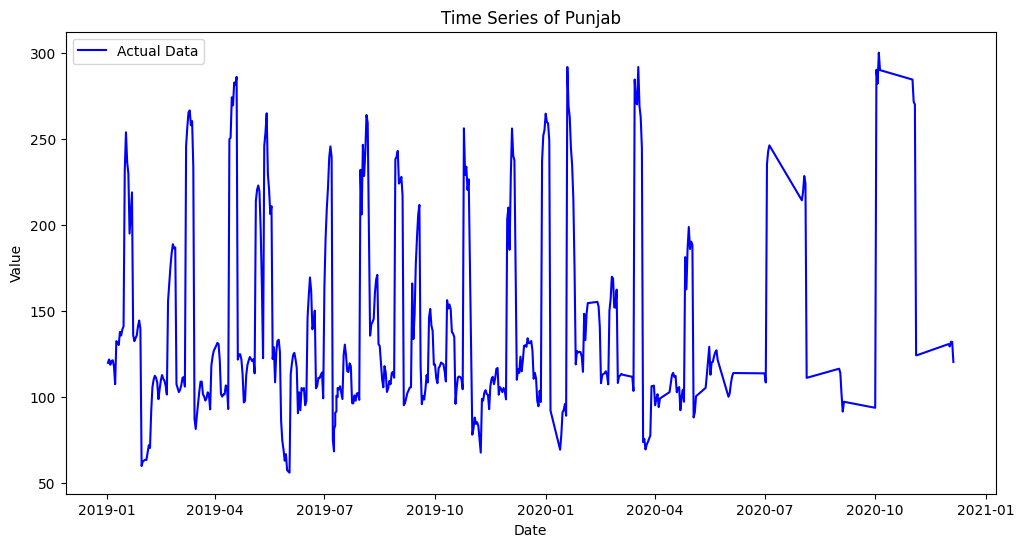

c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shree\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

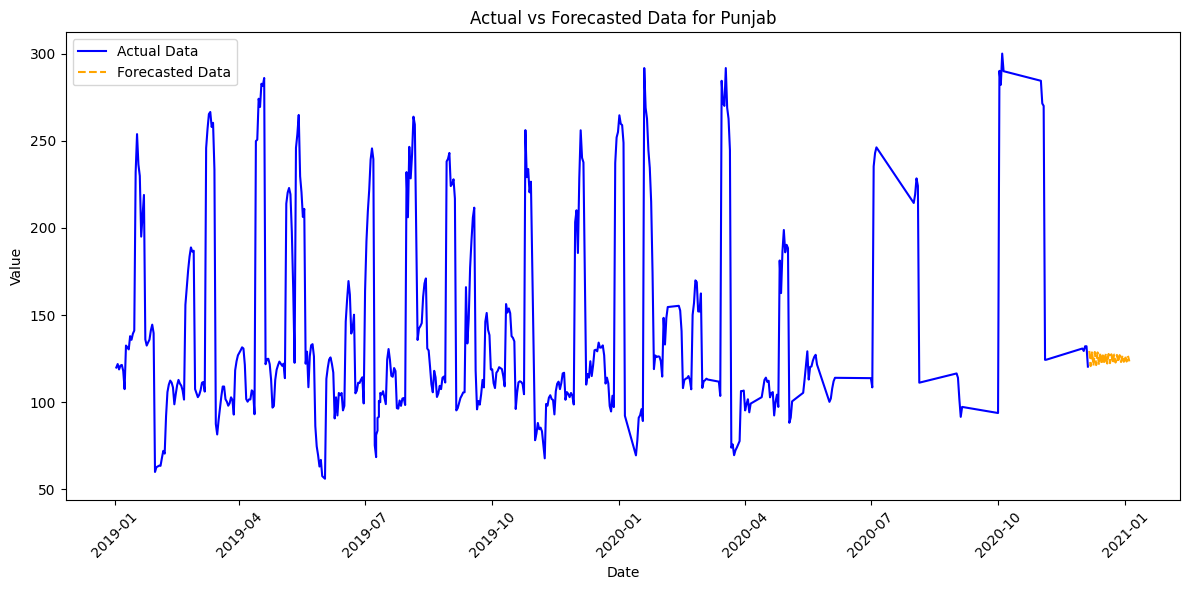

Mean Absolute Error: 17.23
Mean Squared Error: 1297.00
R-squared: 0.60
Forecasted Values for the Next Month:
2020-12-06: 129.41
2020-12-07: 120.72
2020-12-08: 129.11
2020-12-09: 121.01
2020-12-10: 128.82
2020-12-11: 121.28
2020-12-12: 128.56
2020-12-13: 121.54
2020-12-14: 128.31
2020-12-15: 121.78
2020-12-16: 128.08
2020-12-17: 122.00
2020-12-18: 127.87
2020-12-19: 122.20
2020-12-20: 127.67
2020-12-21: 122.40
2020-12-22: 127.48
2020-12-23: 122.58
2020-12-24: 127.31
2020-12-25: 122.74
2020-12-26: 127.15
2020-12-27: 122.90
2020-12-28: 127.00
2020-12-29: 123.04
2020-12-30: 126.86
2020-12-31: 123.17
2021-01-01: 126.73
2021-01-02: 123.30
2021-01-03: 126.61
2021-01-04: 123.42


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('C:/Users/Shree/Desktop/dataset_tk.csv')

# Preprocess the Data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

# Selecting one state for analysis (e.g., Punjab)
series = df['Punjab']

# Step 3: Time Series Analysis
plt.figure(figsize=(12, 6))
plt.plot(series, label='Actual Data', color='blue')
plt.title('Time Series of Punjab')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Step 4: Fit ARIMA Model
model = ARIMA(series, order=(1, 1, 1))  # Adjust the order (p, d, q) as needed
model_fit = model.fit()

# Step 5: Forecasting
forecast_steps = 30  # Forecast for the next month
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Step 6: Visualize
plt.figure(figsize=(12, 6))
plt.plot(series, label='Actual Data', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted Data', color='orange', linestyle='--')
plt.title('Actual vs Forecasted Data for Punjab')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

# Step 7: Calculate Accuracy
# Since we don't have actual future values, we will calculate the metrics using the last available values
# Here we would usually compare with the actual future values.
# For demonstration purposes, we can only calculate the accuracy on the training data if needed.

# Calculate MAE, MSE, and R-squared on the training set
predictions = model_fit.predict(start=series.index[0], end=series.index[-1])
mae = mean_absolute_error(series, predictions)
mse = mean_squared_error(series, predictions)
r2 = r2_score(series, predictions)

# Print accuracy metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Print forecasted values for the next month
print("Forecasted Values for the Next Month:")
for date, value in zip(forecast_index, forecast):
    print(f'{date.date()}: {value:.2f}')
